In [7]:
# 查看当前挂载的数据集目录
# !ls /home/aistudio/data/
!ls /home/aistudio/data/

In [3]:
# 解压
# !unzip -o -d /home/aistudio/data/ /home/aistudio/data/data1919/Road02.zip
# !unzip -o -d /home/aistudio/data/ /home/aistudio/data/data1919/Road03.zip
# !unzip -o -d /home/aistudio/data/ /home/aistudio/data/data1919/Road04.zip
# !unzip -o -d /home/aistudio/data/ /home/aistudio/data/data1919/Labels_Fixed.zip
!unzip -o -d /home/aistudio/data/ /home/aistudio/data/data2492/TestSet.zip
print('finish')

In [9]:
! ls /home/aistudio/data/Test_data2/
# import zipfile
# z = zipfile.ZipFile('/home/aistudio/data/data1919/Labels_Fixed.zip', 'r')
# z.extractall(path="/home/aistudio/data/Test_data2/")
# z.close()

ls: cannot access '/home/aistudio/data/Test_data2/Label_road04/Label/Record001/Camera': No such file or directory
ls: cannot access '5/': No such file or directory


total number 999
0


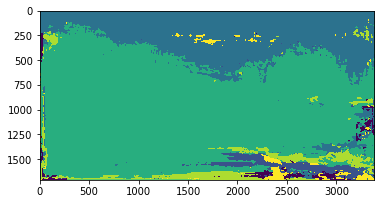

In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import cv2
import numpy as np
import os
import six
import random
from PIL import Image
from collections import namedtuple


#------------------------------Dataset---------------------------------------------------
# BaiduCarDataset
# BaiduCarTestDataset
#------------------------------
Label = namedtuple( 'Label' , ['name' ,'id','trainId','category','categoryId','hasInstances','ignoreInEval','color'] )
labels = [
# name id trainId category catId hasInstances ignoreInEval color
Label( 'void' , 0 , 0, 'void' , 0 , False , False , ( 0, 0, 0) ),
Label( 's_w_d' , 200 , 1 , 'dividing' , 1 , False , False , ( 70, 130, 180) ),
Label( 's_y_d' , 204 , 1 , 'dividing' , 1 , False , False , (220, 20, 60) ),
Label( 'ds_w_dn' , 213 , 1 , 'dividing' , 1 , False , True , (128, 0, 128) ),
Label( 'ds_y_dn' , 209 , 1 , 'dividing' , 1 , False , False , (255, 0, 0) ),
Label( 'sb_w_do' , 206 , 1 , 'dividing' , 1 , False , True , ( 0, 0, 60) ),
Label( 'sb_y_do' , 207 , 1 , 'dividing' , 1 , False , True , ( 0, 60, 100) ),
Label( 'b_w_g' , 201 , 2 , 'guiding' , 2 , False , False , ( 0, 0, 142) ),
Label( 'b_y_g' , 203 , 2 , 'guiding' , 2 , False , False , (119, 11, 32) ),
Label( 'db_w_g' , 211 , 2 , 'guiding' , 2 , False , True , (244, 35, 232) ),
Label( 'db_y_g' , 208 , 2 , 'guiding' , 2 , False , True , ( 0, 0, 160) ),
Label( 'db_w_s' , 216 , 3 , 'stopping' , 3 , False , True , (153, 153, 153) ),
Label( 's_w_s' , 217 , 3 , 'stopping' , 3 , False , False , (220, 220, 0) ),
Label( 'ds_w_s' , 215 , 3 , 'stopping' , 3 , False , True , (250, 170, 30) ),
Label( 's_w_c' , 218 , 4 , 'chevron' , 4 , False , True , (102, 102, 156) ),
Label( 's_y_c' , 219 , 4 , 'chevron' , 4 , False , True , (128, 0, 0) ),
Label( 's_w_p' , 210 , 5 , 'parking' , 5 , False , False , (128, 64, 128) ),
Label( 's_n_p' , 232 , 5 , 'parking' , 5 , False , True , (238, 232, 170) ),
Label( 'c_wy_z' , 214 , 6 , 'zebra' , 6 , False , False , (190, 153, 153) ),
Label( 'a_w_u' , 202 , 7 , 'thru/turn' , 7 , False , True , ( 0, 0, 230) ),
Label( 'a_w_t' , 220 , 7 , 'thru/turn' , 7 , False , False , (128, 128, 0) ),
Label( 'a_w_tl' , 221 , 7 , 'thru/turn' , 7 , False , False , (128, 78, 160) ),
Label( 'a_w_tr' , 222 , 7 , 'thru/turn' , 7 , False , False , (150, 100, 100) ),
Label( 'a_w_tlr' , 231 , 7 , 'thru/turn' , 7 , False , True , (255, 165, 0) ),
Label( 'a_w_l' , 224 , 7 , 'thru/turn' , 7 , False , False , (180, 165, 180) ),
Label( 'a_w_r' , 225 , 7 , 'thru/turn' , 7 , False , False , (107, 142, 35) ),
Label( 'a_w_lr' , 226 , 7 , 'thru/turn' , 7 , False , False , (201, 255, 229) ),
Label( 'a_n_lu' , 230 , 7 , 'thru/turn' , 7 , False , True , (0, 191, 255) ),
Label( 'a_w_tu' , 228 , 7 , 'thru/turn' , 7 , False , True , ( 51, 255, 51) ),
Label( 'a_w_m' , 229 , 7 , 'thru/turn' , 7 , False , True , (250, 128, 114) ),
Label( 'a_y_t' , 233 , 7 , 'thru/turn' , 7 , False , True , (127, 255, 0) ),
Label( 'b_n_sr' , 205 , 8 , 'reduction' , 8 , False , False , (255, 128, 0) ),
Label( 'd_wy_za' , 212 , 8 , 'attention' , 8 , False , True , ( 0, 255, 255) ),
Label( 'r_wy_np' , 227 , 8 , 'no parking' , 8 , False , False , (178, 132, 190) ),
Label( 'vom_wy_n' , 223 , 8 , 'others' , 8 , False , True , (128, 128, 64) ),
Label( 'om_n_n' , 250 , 8 , 'others' , 8 , False , False , (102, 0, 204) ),
Label( 'noise' , 249 , 0 , 'ignored' , 0 , False , True , ( 0, 153, 153) ),
Label( 'ignored' , 255 , 0 , 'ignored' , 0 , False , True , (255, 255, 255) ),
]


default_config = {
    "shuffle": True,
    "crop_size": (769,769)
}

infer_config = {
    "shuffle": False,
    "crop_size": (-1,-1),
}

def slice_with_pad(a, s, value=0):
    pads = []
    slices = []
    for i in range(len(a.shape)):
        if i >= len(s):
            pads.append([0, 0])
            slices.append([0, a.shape[i]])
        else:
            l, r = s[i]
            if l < 0:
                pl = -l
                l = 0
            else:
                pl = 0
            if r > a.shape[i]:
                pr = r - a.shape[i]
                r = a.shape[i]
            else:
                pr = 0
            pads.append([pl, pr])
            slices.append([l, r])
    slices = list(map(lambda x: slice(x[0], x[1], 1), slices))
    a = a[slices]
    a = np.pad(a, pad_width=pads, mode='constant', constant_values=value)
    return a

def image2label(label,cm2lbl):
    data = np.array(label, dtype='int32')
    idx = (data[:, :, 0] * 256 + data[:, :, 1]) * 256 + data[:, :, 2]
    return np.array(cm2lbl[idx], dtype='int64')  # 根据索引得到 label 矩阵

class BaiduCarDataset:
    def __init__(self, dataset_dir, subset='train', config=default_config, crop=False, flip_rate=0.):
        label_dirname = os.path.join(dataset_dir, 'Label_road02/Label/')
        label_files=list()
        for dire in os.listdir(label_dirname):
            for dir in os.listdir(os.path.join(label_dirname, dire,'Camera 5')):
                    label_files.append(os.path.join(label_dirname, dire, 'Camera 5/', dir))
            for dir in os.listdir(os.path.join(label_dirname, dire, 'Camera 6')):
                label_files.append(os.path.join(label_dirname, dire, 'Camera 6/', dir))
        label_dirname = os.path.join(dataset_dir, 'Label_road03/Label/')
        for dire in os.listdir(label_dirname):
            for dir in os.listdir(os.path.join(label_dirname, dire, 'Camera 5')):
                label_files.append(os.path.join(label_dirname, dire, 'Camera 5/', dir))
            for dir in os.listdir(os.path.join(label_dirname, dire, 'Camera 6')):
                label_files.append(os.path.join(label_dirname, dire, 'Camera 6/', dir))
        label_dirname = os.path.join(dataset_dir, 'Label_road04/Label/')
        for dire in os.listdir(label_dirname):
            for dir in os.listdir(os.path.join(label_dirname, dire, 'Camera 5')):
                label_files.append(os.path.join(label_dirname, dire, 'Camera 5/', dir))
            for dir in os.listdir(os.path.join(label_dirname, dire, 'Camera 6')):
                label_files.append(os.path.join(label_dirname, dire, 'Camera 6/', dir))
        self.label2grey = np.zeros(9, dtype='uint8')
        for i in range(9):
            for obj in labels:
                if obj.trainId == i:
                    self.label2grey[i] = obj.id
        self.label_files = label_files
        self.label_dirname = label_dirname
        self.index = 0
        self.subset = subset
        self.dataset_dir = dataset_dir
        self.config = config
        self.crop=crop
        self.flip_rate=flip_rate
        self.cm2lbl = np.zeros(256 ** 3)  # 每个像素点有 0 ~ 255 的选择，RGB 三个通道
        for obj in labels:
            if obj.ignoreInEval:
                color = obj.color
                cm = color
                self.cm2lbl[(cm[0] * 256 + cm[1]) * 256 + cm[2]] = 9  # 建立索引
                continue
            idx = obj.trainId
            color = obj.color
            cm = color
            self.cm2lbl[(cm[0] * 256 + cm[1]) * 256 + cm[2]] = idx  # 建立索引
        if subset == 'train':
            self.crop = True
            self.flip_rate = 0.5
        self.new_h, self.new_w = self.config["crop_size"]
        self.reset()
        print("total number", len(label_files))

    def reset(self, shuffle=False):
        self.index = 0
        if self.config["shuffle"]:
            np.random.shuffle(self.label_files)  #打乱顺序

    def next_img(self):
        self.index += 1
        if self.index >= len(self.label_files):
            self.reset()

    def get_img(self):
        while True:
            ln = self.label_files[self.index]
            img_name=ln
            if 'Label_road02' in ln:
                img_name = img_name.replace('Label_road02/Label/', 'ColorImage_road02/ColorImage/')
                img_name = img_name.replace('_bin.png', '.jpg')
            elif 'Label_road03' in ln:
                img_name = img_name.replace('Label_road03/Label/', 'ColorImage_road03/ColorImage/')
                img_name = img_name.replace('_bin.png', '.jpg')
            elif 'Label_road04' in ln:
                img_name = img_name.replace('Label_road04/Label/', 'ColorImage_road04/ColorImage/')
                img_name = img_name.replace('_bin.png', '.jpg')
            label = Image.open(ln).convert('RGB')
            label = np.asarray(label, dtype='int32')
            label=image2label(label, self.cm2lbl)
            # img = cv2.imread(img_name)
            img = Image.open(img_name).convert('RGB')
            img = np.asarray(img, dtype='int64')
            if img is None:
                print("load img failed:", img_name)
                self.next_img()
            else:
                break
        if self.new_h == -1:
            return img, label, ln
        if self.crop:
            h, w, _ = img.shape
            top   = random.randint(0, h - self.new_h)
            left  = random.randint(0, w - self.new_w)
            img   = img[top:top + self.new_h, left:left + self.new_w]
            label = label[top:top + self.new_h, left:left + self.new_w]

        if random.random() < self.flip_rate:
            img   = np.fliplr(img)
            label = np.fliplr(label)

        return img, label, ln

    def get_batch(self, batch_size=1):
        imgs = []
        labels = []
        names = []
        while len(imgs) < batch_size:
            img, label, ln = self.get_img()
            imgs.append(img)
            labels.append(label)
            names.append(ln)
            self.next_img()
        return np.array(imgs), np.array(labels), names

    def get_batch_generator(self, batch_size, total_step):
        def do_get_batch():
            for i in range(total_step):
                imgs, labels, names = self.get_batch(batch_size)
                labels = labels.astype(np.int32)
                imgs = imgs[:, :, :, ::-1].transpose(
                    0, 3, 1, 2).astype(np.float32) / (255.0 / 2) - 1
                yield i, imgs, labels, names

        batches = do_get_batch()
        try:
            from prefetch_generator import BackgroundGenerator
            batches = BackgroundGenerator(batches, 100)
        except:
            print(
                "You can install 'prefetch_generator' for acceleration of data reading."
            )
        return batches


class BaiduCarTestDataset:
    def __init__(self, dataset_dir, subset='Test', config=infer_config, crop=False, flip_rate=0.):
        img_dirname = os.path.join(dataset_dir, 'ColorImage/')
        img_files=list()
        for dir in os.listdir(img_dirname):
            img_files.append(os.path.join(img_dirname, dir))

        self.label2grey = np.zeros(9, dtype='uint8')
        for i in range(9):
            for obj in labels:
                if obj.trainId == i:
                    self.label2grey[i] = obj.id
        self.img_files = img_files
        self.img_dirname = img_dirname
        self.index = 0
        self.subset = subset
        self.dataset_dir = dataset_dir
        self.config = config
        self.crop=crop
        self.flip_rate=flip_rate
        self.cm2lbl = np.zeros(256 ** 3)  # 每个像素点有 0 ~ 255 的选择，RGB 三个通道
        for obj in labels:
            if obj.ignoreInEval:
                continue
            idx = obj.trainId
            color = obj.color
            cm = color
            self.cm2lbl[(cm[0] * 256 + cm[1]) * 256 + cm[2]] = idx  # 建立索引
        self.new_h, self.new_w = self.config["crop_size"]
        self.reset()
        print("total number", len(img_files))

    def reset(self, shuffle=False):
        self.index = 0
        if self.config["shuffle"]:
            np.random.shuffle(self.img_files)  #打乱顺序

    def next_img(self):
        self.index += 1
        if self.index >= len(self.img_files):
            self.reset()

    def get_img(self):
        while True:
            ln = self.img_files[self.index]
            img_name=ln
            img = Image.open(img_name).convert('RGB')
            img = np.asarray(img, dtype='int64')
            if img is None:
                print("load img failed:", img_name)
                self.next_img()
            else:
                break
        if self.new_h == -1:
            return img, ln
        if self.crop:
            h, w, _ = img.shape
            top   = random.randint(0, h - self.new_h)
            left  = random.randint(0, w - self.new_w)
            img   = img[top:top + self.new_h, left:left + self.new_w]

        if random.random() < self.flip_rate:
            img   = np.fliplr(img)

        return img, ln

    def get_batch(self, batch_size=1):
        imgs = []
        names = []
        while len(imgs) < batch_size:
            img, ln = self.get_img()
            imgs.append(img)
            names.append(ln)
            self.next_img()
        return np.array(imgs), names

    def get_batch_generator(self, batch_size, total_step):
        def do_get_batch():
            for i in range(total_step):
                imgs, names = self.get_batch(batch_size)
                imgs = imgs[:, :, :, ::-1].transpose(
                    0, 3, 1, 2).astype(np.float32) / (255.0 / 2) - 1
                yield i, imgs, names

        batches = do_get_batch()
        try:
            from prefetch_generator import BackgroundGenerator
            batches = BackgroundGenerator(batches, 100)
        except:
            print(
                "You can install 'prefetch_generator' for acceleration of data reading."
            )
        return batches


#-----------------------------------model--------------------------------------------

#----------------------------------------
import paddle
import paddle.fluid as fluid
import contextlib

name_scope = ""
op_results = {}
class model:
    def __init__(self, bn_momentum = 0.99, dropout_keep_prop = 0.9, is_train = True, label_number = 9):

        # name_scope = ""
        # op_results = {}

        self.decode_channel = 48
        self.encode_channel = 256
        self.label_number = label_number

        self.bn_momentum = bn_momentum
        self.dropout_keep_prop = dropout_keep_prop
        self.is_train = is_train


        self.default_epsilon = 1e-3
        self.default_norm_type = 'bn'
        self.default_group_number = 32
        self.depthwise_use_cudnn = False

        self.bn_regularizer = fluid.regularizer.L2DecayRegularizer(regularization_coeff=0.0)
        self.depthwise_regularizer = fluid.regularizer.L2DecayRegularizer(
                regularization_coeff=0.0)

    @contextlib.contextmanager
    def scope(self, name):
        global name_scope
        bk = name_scope
        name_scope = name_scope + name + '/'
        yield
        name_scope = bk

    def check(self, data, number):
        if type(data) == int:
            return [data] * number
        assert len(data) == number
        return data

    def clean(self):
        global op_results
        op_results = {}

    def append_op_result(self, result, name):
        global op_results
        op_index = len(op_results)
        name = name_scope + name + str(op_index)
        op_results[name] = result
        return result

    def conv(self, *args, **kargs):
        if "xception" in name_scope:
            init_std = 0.09
        elif "logit" in name_scope:
            init_std = 0.01
        elif name_scope.endswith('depthwise/'):
            init_std = 0.33
        else:
            init_std = 0.06
        if name_scope.endswith('depthwise/'):
            regularizer = self.depthwise_regularizer
        else:
            regularizer = None

        kargs['param_attr'] = fluid.ParamAttr(
            name=name_scope + 'weights',
            regularizer=regularizer,
            initializer=fluid.initializer.TruncatedNormal(
                loc=0.0, scale=init_std))
        if 'bias_attr' in kargs and kargs['bias_attr']:
            kargs['bias_attr'] = fluid.ParamAttr(
                name=name_scope + 'biases',
                regularizer=regularizer,
                initializer=fluid.initializer.ConstantInitializer(value=0.0))
        else:
            kargs['bias_attr'] = False
        kargs['name'] = name_scope + 'conv'
        return self.append_op_result(fluid.layers.conv2d(*args, **kargs), 'conv')

    def group_norm(self, input, G, eps=1e-5, param_attr=None, bias_attr=None):
        N, C, H, W = input.shape
        if C % G != 0:
            # print "group can not divide channle:", C, G
            for d in range(10):
                for t in [d, -d]:
                    if G + t <= 0: continue
                    if C % (G + t) == 0:
                        G = G + t
                        break
                if C % G == 0:
                    # print "use group size:", G
                    break
        assert C % G == 0
        x = fluid.layers.group_norm(
            input,
            groups=G,
            param_attr=param_attr,
            bias_attr=bias_attr,
            name=name_scope + 'group_norm')
        return x

    def bn(self, *args, **kargs):
        if self.default_norm_type == 'bn':
            with self.scope('BatchNorm'):
                return self.append_op_result(
                    fluid.layers.batch_norm(
                        *args,
                        epsilon=default_epsilon,
                        momentum=self.bn_momentum,
                        param_attr=fluid.ParamAttr(
                            name=name_scope + 'gamma', regularizer=self.bn_regularizer),
                        bias_attr=fluid.ParamAttr(
                            name=name_scope + 'beta', regularizer=self.bn_regularizer),
                        moving_mean_name=name_scope + 'moving_mean',
                        moving_variance_name=name_scope + 'moving_variance',
                        **kargs),
                    'bn')
        elif self.default_norm_type == 'gn':
            with self.scope('GroupNorm'):
                return self.append_op_result(
                    self.group_norm(
                        args[0],
                        self.default_group_number,
                        eps=default_epsilon,
                        param_attr=fluid.ParamAttr(
                            name=name_scope + 'gamma', regularizer=self.bn_regularizer),
                        bias_attr=fluid.ParamAttr(
                            name=name_scope + 'beta', regularizer=self.bn_regularizer)),
                    'gn')
        else:
            raise "Unsupport norm type:" + self.default_norm_type

    def bn_relu(self, data):
        return self.append_op_result(fluid.layers.relu(self.bn(data)), 'relu')

    def relu(self, data):
        return self.append_op_result(fluid.layers.relu(data), 'relu')

    def seq_conv(self, input, channel, stride, filter, dilation=1, act=None):
        with self.scope('depthwise'):
            input = self.conv(
                input,
                input.shape[1],
                filter,
                stride,
                groups=input.shape[1],
                padding=(filter // 2) * dilation,
                dilation=dilation,
                use_cudnn=self.depthwise_use_cudnn)
            input = self.bn(input)
            if act: input = act(input)
        with self.scope('pointwise'):
            input = self.conv(input, channel, 1, 1, groups=1, padding=0)
            input = self.bn(input)
            if act: input = act(input)
        return input

    def xception_block(self, input,
                       channels,
                       strides=1,
                       filters=3,
                       dilation=1,
                       skip_conv=True,
                       has_skip=True,
                       activation_fn_in_separable_conv=False):
        repeat_number = 3
        channels = self.check(channels, repeat_number)
        filters = self.check(filters, repeat_number)
        strides = self.check(strides, repeat_number)
        data = input
        results = []
        for i in range(repeat_number):
            with self.scope('separable_conv' + str(i + 1)):
                if not activation_fn_in_separable_conv:
                    data = self.relu(data)
                    data = self.seq_conv(
                        data,
                        channels[i],
                        strides[i],
                        filters[i],
                        dilation=dilation)
                else:
                    data = self.seq_conv(
                        data,
                        channels[i],
                        strides[i],
                        filters[i],
                        dilation=dilation,
                        act=self.relu)
                results.append(data)
        if not has_skip:
            return self.append_op_result(data, 'xception_block'), results
        if skip_conv:
            with self.scope('shortcut'):
                skip = self.bn(
                    self.conv(
                        input, channels[-1], 1, strides[-1], groups=1, padding=0))
        else:
            skip = input
        return self.append_op_result(data + skip, 'xception_block'), results

    def entry_flow(self, data):
        with self.scope("entry_flow"):
            with self.scope("conv1"):
                data = self.conv(data, 32, 3, stride=2, padding=1)
                data = self.bn_relu(data)
            with self.scope("conv2"):
                data = self.conv(data, 64, 3, stride=1, padding=1)
                data = self.bn_relu(data)
            with self.scope("block1"):
                data, _ = self.xception_block(data, 128, [1, 1, 2])
            with self.scope("block2"):
                data, results = self.xception_block(data, 256, [1, 1, 2])
            with self.scope("block3"):
                data, _ = self.xception_block(data, 728, [1, 1, 2])
            return data, results[1]

    def middle_flow(self, data):
        with self.scope("middle_flow"):
            for i in range(16):
                with self.scope("block" + str(i + 1)):
                    data, _ = self.xception_block(data, 728, [1, 1, 1], skip_conv=False)
        return data

    def exit_flow(self, data):
        with self.scope("exit_flow"):
            with self.scope('block1'):
                data, _ = self.xception_block(data, [728, 1024, 1024], [1, 1, 1])
            with self.scope('block2'):
                data, _ = self.xception_block(
                    data, [1536, 1536, 2048], [1, 1, 1],
                    dilation=2,
                    has_skip=False,
                    activation_fn_in_separable_conv=True)
            return data

    def dropout(self, x, keep_rate):
        if self.is_train:
            return fluid.layers.dropout(x, 1 - keep_rate) / keep_rate
        else:
            return x

    def encoder(self, input):
        with self.scope('encoder'):
            channel = 256
            with self.scope("image_pool"):
                image_avg = fluid.layers.reduce_mean(input, [2, 3], keep_dim=True)
                self.append_op_result(image_avg, 'reduce_mean')
                image_avg = self.bn_relu(
                    self.conv(
                        image_avg, channel, 1, 1, groups=1, padding=0))
                image_avg = fluid.layers.resize_bilinear(image_avg, input.shape[2:])

            with self.scope("aspp0"):
                aspp0 = self.bn_relu(self.conv(input, channel, 1, 1, groups=1, padding=0))
            with self.scope("aspp1"):
                aspp1 = self.seq_conv(input, channel, 1, 3, dilation=6, act=self.relu)
            with self.scope("aspp2"):
                aspp2 = self.seq_conv(input, channel, 1, 3, dilation=12, act=self.relu)
            with self.scope("aspp3"):
                aspp3 = self.seq_conv(input, channel, 1, 3, dilation=18, act=self.relu)
            with self.scope("concat"):
                data = self.append_op_result(
                    fluid.layers.concat(
                        [image_avg, aspp0, aspp1, aspp2, aspp3], axis=1),
                    'concat')
                data = self.bn_relu(self.conv(data, channel, 1, 1, groups=1, padding=0))
                data = self.dropout(data, self.dropout_keep_prop)
            return data

    def decoder(self, encode_data, decode_shortcut):
        with self.scope('decoder'):
            with self.scope('concat'):
                decode_shortcut = self.bn_relu(
                    self.conv(
                        decode_shortcut, self.decode_channel, 1, 1, groups=1, padding=0))
                encode_data = fluid.layers.resize_bilinear(
                    encode_data, decode_shortcut.shape[2:])
                encode_data = fluid.layers.concat(
                    [encode_data, decode_shortcut], axis=1)
                self.append_op_result(encode_data, 'concat')
            with self.scope("separable_conv1"):
                encode_data = self.seq_conv(
                    encode_data, self.encode_channel, 1, 3, dilation=1, act=self.relu)
            with self.scope("separable_conv2"):
                encode_data = self.seq_conv(
                    encode_data, self.encode_channel, 1, 3, dilation=1, act=self.relu)
            return encode_data

    def deeplabv3p(self, img):
        global default_epsilon
        self.append_op_result(img, 'img')
        with self.scope('xception_65'):
            default_epsilon = 1e-3
            # Entry flow
            data, decode_shortcut = self.entry_flow(img)
            # Middle flow
            data = self.middle_flow(data)
            # Exit flow
            data = self.exit_flow(data)
        default_epsilon = 1e-5
        encode_data = self.encoder(data)
        encode_data = self.decoder(encode_data, decode_shortcut)
        with self.scope('logit'):
            logit = self.conv(
                encode_data, self.label_number, 1, stride=1, padding=0, bias_attr=True)
            logit = fluid.layers.resize_bilinear(logit, img.shape[2:])
        return logit


#--------------------------------------------train------------------------------------
import os
os.environ['FLAGS_fraction_of_gpu_memory_to_use'] = '0.9'
import time

class train:
    def __init__(self, init_weights_path = None, save_weights_path = None,
                 dataset_path=None, train_crop_size=769, total_step=1000):
        self.batch_size = 1
        self.base_lr = 0.0001
        self.total_step = total_step
        self.init_weights_path = init_weights_path
        self.save_weights_path = save_weights_path
        self.dataset_path = dataset_path
        self.parallel = False
        self.use_gpu = True
        self.num_classes = 9
        self.no_grad_set = set()
        self.crop_size = train_crop_size
        self.weight_decay = 0.00004
        self.use_gpu=False
        self.parallel=False
    def load_model(self, tp, exe):
        myvars = [
            x for x in tp.list_vars()
            if isinstance(x, fluid.framework.Parameter) and x.name.find('logit') ==
            -1
        ]
        if self.init_weights_path.endswith('/'):
            if self.num_classes == 9:
                fluid.io.load_params(
                    exe, dirname=self.init_weights_path, main_program=tp)
            else:
                fluid.io.load_vars(exe, dirname=self.init_weights_path, vars=myvars)
        else:
            if self.num_classes == 9:
                fluid.io.load_params(
                    exe,
                    dirname="",
                    filename=self.init_weights_path,
                    main_program=tp)
            else:
                fluid.io.load_vars(
                    exe, dirname="", filename=self.init_weights_path, vars=myvars)

    def save_model(self, tp, exe):
        if self.save_weights_path.endswith('/'):
            fluid.io.save_params(
                exe, dirname=self.save_weights_path, main_program=tp)
        else:
            fluid.io.save_params(
                exe, dirname="", filename=self.save_weights_path, main_program=tp)

    def loss(self, logit, label):
        label_nignore = (label < self.num_classes).astype('float32')
        label_zero = (label==0).astype('float32')
        label_nignore = label_nignore - 0.98*label_zero
        label = fluid.layers.elementwise_min(
            label,
            fluid.layers.assign(np.array(
                [self.num_classes - 1], dtype=np.int32)))
        logit = fluid.layers.transpose(logit, [0, 2, 3, 1])
        logit = fluid.layers.reshape(logit, [-1, self.num_classes])
        label = fluid.layers.reshape(label, [-1, 1])
        label = fluid.layers.cast(label, 'int64')
        label_nignore = fluid.layers.reshape(label_nignore, [-1, 1])
        # label_zero = fluid.layers.reshape(label_zero, [-1, 1])
        loss = fluid.layers.softmax_with_cross_entropy(logit, label, ignore_index=9)
        loss = loss * label_nignore
        self.no_grad_set.add(label_nignore.name)
        self.no_grad_set.add(label.name)
        return loss, label_nignore

    def training(self):

        model_t=model(bn_momentum=0.9997, dropout_keep_prop=0.9, label_number = self.num_classes )
        model_t.clean()
        deeplabv3p = model_t.deeplabv3p

        sp = fluid.Program()
        tp = fluid.Program()


        image_shape = [self.crop_size, self.crop_size]

        with fluid.program_guard(tp, sp):
            img = fluid.layers.data(
                name='img', shape=[3] + image_shape, dtype='float32')
            label = fluid.layers.data(name='label', shape=image_shape, dtype='int32')
            logit = deeplabv3p(img)
            pred = fluid.layers.argmax(logit, axis=1).astype('int32')
            loss, mask = self.loss(logit, label)
            # lr = fluid.layers.polynomial_decay(
            #     base_lr, total_step, end_learning_rate=0, power=0.9)
            lr = self.base_lr
            area = fluid.layers.elementwise_max(
                fluid.layers.reduce_mean(mask),
                fluid.layers.assign(np.array(
                    [0.1], dtype=np.float32)))
            loss_mean = fluid.layers.reduce_mean(loss) / area

            opt = fluid.optimizer.Adam(
                lr,
                # momentum=0.9,
                regularization=fluid.regularizer.L2DecayRegularizer(
                    regularization_coeff=self.weight_decay), )
            retv = opt.minimize(loss_mean, startup_program=sp, no_grad_set=self.no_grad_set)

        fluid.memory_optimize(
            tp, print_log=False, skip_opt_set=set([pred.name, loss_mean.name]), level=1)

        place = fluid.CPUPlace()
        if self.use_gpu:
            place = fluid.CUDAPlace(0)
        exe = fluid.Executor(place)
        exe.run(sp)

        if self.init_weights_path:
            print("load from:", self.init_weights_path)
            self.load_model(tp, exe)

        default_config['crop_size'] = (self.crop_size,self.crop_size)
        default_config['shuffle'] = True
        dataset = BaiduCarDataset(self.dataset_path, 'train', default_config)

        if self.parallel:
            exe_p = fluid.ParallelExecutor(
                use_cuda=True, loss_name=loss_mean.name, main_program=tp)
        #
        batches = dataset.get_batch_generator(self.batch_size, self.total_step)

        total_time = 0.0
        epoch_idx = 0
        train_loss = 0

        for i, imgs, labels, names in batches:
            epoch_idx += 1
            begin_time = time.time()
            prev_start_time = time.time()
            if self.parallel:
                retv = exe_p.run(fetch_list=[pred.name, loss_mean.name],
                                 feed={'img': imgs,
                                       'label': labels})
            else:
                retv = exe.run(tp,
                               feed={'img': imgs,
                                     'label': labels},
                               fetch_list=[pred, loss_mean])
            end_time = time.time()
            total_time += end_time - begin_time
            if i % 100 == 0:
                print("Model is saved to", self.save_weights_path)
                self.save_model(tp, exe)
            print("step {:d}, loss: {:.6f}, step_time_cost: {:.3f}".format(
                i, np.mean(retv[1]), end_time - prev_start_time))

            # only for ce
            train_loss = np.mean(retv[1])

        print("Training done. Model is saved to", self.save_weights_path)
        self.save_model(tp, exe)

#--------------------------------------------infer------------------------------------

class infer:
    def __init__(self, init_weights_path = None, dataset_path=None, total_step=1000):
        self.batch_size = 1
        self.total_step = total_step
        self.init_weights_path = init_weights_path
        self.dataset_path = dataset_path
        self.parallel = False
        self.use_gpu = True
        self.num_classes = 9
        self.no_grad_set = set()
        self.crop_size = -1
        self.use_gpu=False
        self.parallel=False
    def load_model(self, tp, exe):
        myvars = [
            x for x in tp.list_vars()
            if isinstance(x, fluid.framework.Parameter) and x.name.find('logit') ==
            -1
        ]
        if self.init_weights_path.endswith('/'):
            if self.num_classes == 9:
                fluid.io.load_params(
                    exe, dirname=self.init_weights_path, main_program=tp)
            else:
                fluid.io.load_vars(exe, dirname=self.init_weights_path, vars=myvars)
        else:
            if self.num_classes == 9:
                fluid.io.load_params(
                    exe,
                    dirname="",
                    filename=self.init_weights_path,
                    main_program=tp)
            else:
                fluid.io.load_vars(
                    exe, dirname="", filename=self.init_weights_path, vars=myvars)

    def mean_iou(self, pred, label):
        label = fluid.layers.elementwise_min(
            label, fluid.layers.assign(np.array(
                [self.num_classes], dtype=np.int32)))
        label_ignore = (label == self.num_classes).astype('int32')
        label_nignore = (label != self.num_classes).astype('int32')

        pred = pred * label_nignore + label_ignore * self.num_classes
        pred = pred
        miou, wrong, correct = fluid.layers.mean_iou(pred, label, self.num_classes + 1)
        return miou, wrong, correct

    def infering(self):

        model_t=model(bn_momentum=0.9997, dropout_keep_prop=0.9, label_number = self.num_classes )
        model_t.clean()
        model_t.is_train = False
        deeplabv3p = model_t.deeplabv3p

        sp = fluid.Program()
        tp = fluid.Program()

        image_shape = [1711, 3385]
        eval_shape = [1710, 3384]

        with fluid.program_guard(tp, sp):
            img = fluid.layers.data(name='img', shape=[3, 0, 0], dtype='float32')
            img = fluid.layers.resize_bilinear(img, image_shape)
            logit = deeplabv3p(img)
            logit = fluid.layers.resize_bilinear(logit, eval_shape)
            pred = fluid.layers.argmax(logit, axis=1).astype('int32')

        tp = tp.clone(True)

        fluid.memory_optimize(
            tp,
            print_log=False,
            skip_opt_set=set([pred.name]),
            level=1)

        place = fluid.CPUPlace()
        if self.use_gpu:
            place = fluid.CUDAPlace(0)
        exe = fluid.Executor(place)
        exe.run(sp)

        if self.init_weights_path:
            print("load from:", self.init_weights_path)
            self.load_model(tp, exe)
        #
        dataset = BaiduCarTestDataset(self.dataset_path, 'Test')
        label2grey = dataset.label2grey
        total_step = self.total_step
        batches = dataset.get_batch_generator(self.batch_size, total_step)
        #
        import matplotlib.pyplot as plt
        %matplotlib inline
        for i, imgs, names in batches:
            result = exe.run(tp,
                             feed={'img': imgs,
                                   },
                             fetch_list=[pred])
            # print(result[0].shape)
            pre = np.squeeze(result[0], 0).astype('uint8')
            print(i)
            plt.imshow(pre)
            # plt.show()
            # plt.imshow(label2grey[pre])
            # plt.show()
            # pre1=np.zeros(pre).astype('uint8')
            # png=Image.fromarray(label2grey[pre])
            # plt.imshow(png)
            # plt.show()
            # name=names[0].replace('/TestSet/ColorImage/', '/test/road_name/')
            # name=name.replace('.jpg', '.png')
            # png.save(name)


#--------------------------------------------main------------------------------------

def main():
    train_crop_size = 769
    total_step = 1
    init_weights_path = None
    save_weights_path = './checkpoint/point29/'
    dataset_path = '/home/aistudio/data/'
    # Train=train(init_weights_path,save_weights_path,dataset_path,train_crop_size=train_crop_size,total_step=total_step)
    # Train.training()
    Infer=infer(init_weights_path, dataset_path,total_step)
    Infer.infering()
    # dataset = BaiduCarDataset(dataset_path, 'train', default_config)
    

if __name__ == '__main__':
    # !pip install prefetch_generator
    main()